# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

##### Date

In [33]:
import pandas as pd

In [34]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
12361,17,Self-emp-not-inc,36218,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
11155,26,Private,248990,11th,7,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
5663,53,Local-gov,228723,HS-grad,9,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,40,?,>50K
9237,50,Private,162327,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1902,50,?,>50K
18149,36,Private,180667,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,60,United-States,>50K
17216,33,Local-gov,173806,Assoc-acdm,12,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
13139,23,Private,135138,Bachelors,13,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
7927,30,Local-gov,172822,Assoc-voc,11,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
9151,20,Private,91939,HS-grad,9,Never-married,Adm-clerical,Not-in-family,Black,Female,0,1721,30,United-States,<=50K
31693,46,Private,175925,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K


##### Distributia hour_per_week si age

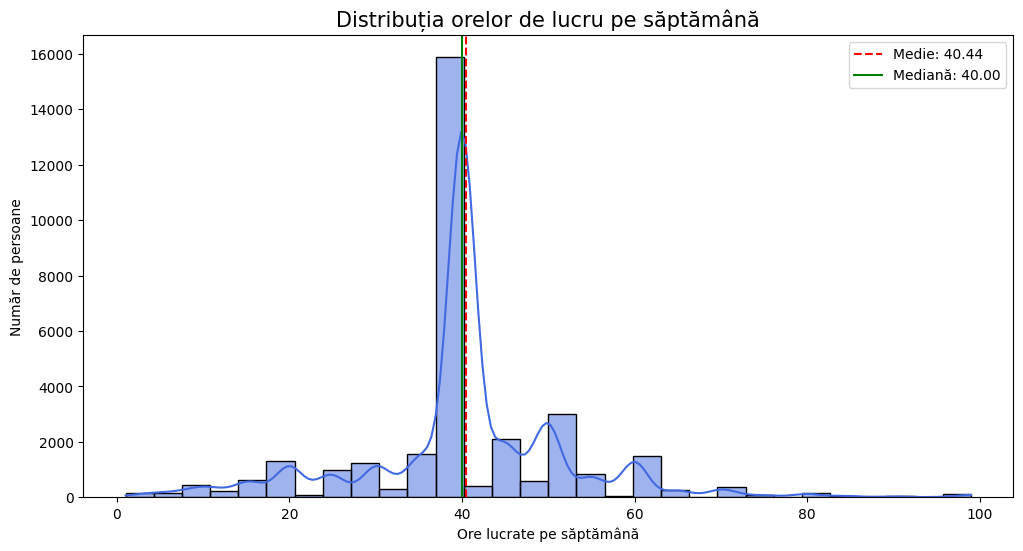

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histograma cu KDE (Kernel Density Estimate)
sns.histplot(data['hours-per-week'], kde=True, color='royalblue', bins=30)

# Adaugam linii pentru Medie și Mediana
plt.axvline(data['hours-per-week'].mean(), color='red', linestyle='--', label=f"Medie: {data['hours-per-week'].mean():.2f}")
plt.axvline(data['hours-per-week'].median(), color='green', linestyle='-', label=f"Mediană: {data['hours-per-week'].median():.2f}")

plt.title('Distribuția orelor de lucru pe săptămână', fontsize=15)
plt.xlabel('Ore lucrate pe săptămână')
plt.ylabel('Număr de persoane')
plt.legend()
plt.show()

Distributia datelor este una leptocurtica, datele avand un varf ascutit in jurul a 40 de ore de lucru pe saptamana (o norma normala de lucru, 8 ore x 5 zile), fiind urmate de alte grupuri mai mici adunate in jurul a 20 ore (probabil program part time) si la 50 ore pe saptamana (ore de overtime). Acest tip de distributie ne indica o variabilitate scazuta in randul populatiei, dar cu extreme destul de mari.

In [ ]:
# Calcularea asimetriei și boltirei

skewness = data['hours-per-week'].skew()
kurtosis = data['hours-per-week'].kurt()

print(f"Skewness (Asimetrie): {skewness:.2f}")
print(f"Kurtosis (Boltire): {kurtosis:.2f}")

Skewness (Asimetrie): 0.23
Kurtosis (Boltire): 2.92


Valoarea de 0.23 indica o asimetrie usor pozitiva spre dreapta a datelor, ceea ce indica faptul ca exista un grup de oameni care lucreaza un numar extrem de mare de ore pe saptamana, aproape de 100 ore ( dupa cum se poate observa din histograma)
Boltirea are o valoare ridicata (2.92), ceea ce ne indica o distributie leptocurtica. Datele sunt concentrate puternic in jurul mediei, indicand un tipar de ore lucrate.

Boxplot hours per week

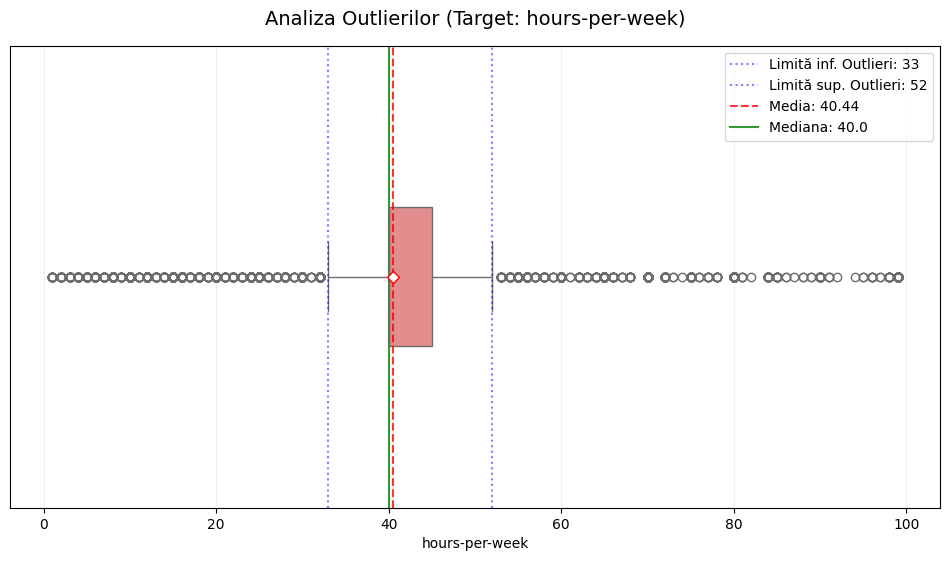

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule
Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
median = data['hours-per-week'].median()
mean = data['hours-per-week'].mean()
actual_min = data[data['hours-per-week'] >= (Q1 - 1.5 * IQR)]['hours-per-week'].min()
actual_max = data[data['hours-per-week'] <= (Q3 + 1.5 * IQR)]['hours-per-week'].max()

plt.figure(figsize=(12, 6))

# Boxplot minimalist
sns.boxplot(x=data['hours-per-week'], color= 'lightcoral', width=0.3, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"red"})

# Linii verticale pentru punctele cheie
plt.axvline(actual_min, color='blue', linestyle=':', alpha=0.5, label=f'Limită inf. Outlieri: {actual_min}')
plt.axvline(actual_max, color='blue', linestyle=':', alpha=0.5, label=f'Limită sup. Outlieri: {actual_max}')
plt.axvline(mean, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', alpha=0.8, label=f'Mediana: {median}')

plt.title('Analiza Outlierilor (Target: hours-per-week)', fontsize=14, pad=15)

# Punem valorile in legenda
plt.legend(loc='upper right', bbox_to_anchor=(1, 1)) 

# Eliminăm axa Y
plt.yticks([]) 
plt.grid(axis='x', alpha=0.2)

plt.show()

Din acest boxplot putem observa ca in interiorul IQR se afla intre 40-45 ore de lucru. Acest lucru ne arata ca majoritatea populatiei are o norma standard de full-time. Conform acestui grafic, valorile mai mici de 33 sau mai mari de 52 de ore sunt considerate outlierii, intrecand limitele quartilelor. Valorile din partea inferioara a graficului ar putea reprezenta persoane varstnice, studenti, someri sau angajati ocazional, in timp ce valorile din partea superioara pot reprezenta persoane ce au nevoie sa lucreze extra pentru un venit mai mare sau antreprenori care mereu sunt in priza cu munca lor.

Boxplot pentru Age

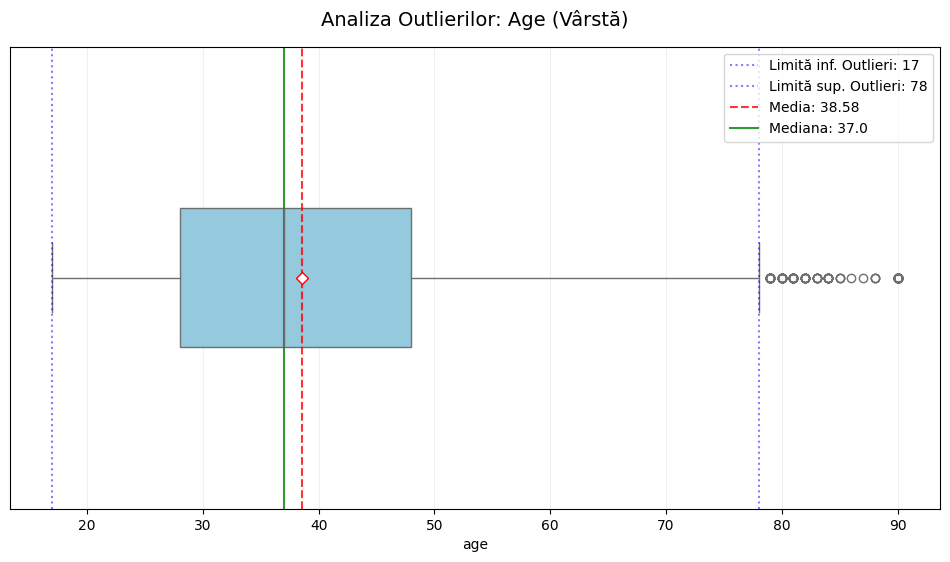

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule specifice pentru coloana 'age'
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
median_age = data['age'].median()
mean_age = data['age'].mean()

# Calculam limitele teoretice pentru mustati (whiskers)
actual_min_age = data[data['age'] >= (Q1_age - 1.5 * IQR_age)]['age'].min()
actual_max_age = data[data['age'] <= (Q3_age + 1.5 * IQR_age)]['age'].max()

plt.figure(figsize=(12, 6))

# Boxplot pentru Age
# Folosim o culoare diferita pentru a le distinge
sns.boxplot(x=data['age'], color='skyblue', width=0.3, showmeans=True,
            meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"red"})

# Linii verticale pentru punctele cheie
plt.axvline(actual_min_age, color='blue', linestyle=':', alpha=0.5, label=f'Limită inf. Outlieri: {actual_min_age}')
plt.axvline(actual_max_age, color='blue', linestyle=':', alpha=0.5, label=f'Limită sup. Outlieri: {actual_max_age}')
plt.axvline(mean_age, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', alpha=0.8, label=f'Mediana: {median_age}')

plt.title('Analiza Outlierilor: Age (Vârstă)', fontsize=14, pad=15)

# Adaugam legenda 
plt.legend(loc='upper right') 

# Curațam aspectul
plt.yticks([]) 
plt.grid(axis='x', alpha=0.2)

plt.show()

In acest caz, majoritatea populatiei are varsta cuprinsa intre 17 ani (limita inferioara) si 78 de ani(limita superioara a quartilei). Media este de 38.5 ani, fiind usor mai mare ca mediana, 37 ani, indicand o distributie asimetrica la dreapta. Acest doi indici ne indica faptul ca majoritatea populatiei este tanara, fiind reprezentata de adulti aflati in floarea carierei. Outliers avem doar dupa limita superioara, fiind reprezentati de cateva persoane cu varste de peste 78 ani. Cea mai mare forta de munca se afla in intervalul aprox 28 ani si 48 ani.
Aceasta vizualizare motiveaza, de asemenea, alegerea de a folosi clipping asupra acestei variabile, outlierii fiind doar intr-o zona extrema si a varstei biologice, pastrandu-se nuanta de batranete in continuitatea datelor, aceasta categorie de varsta fiind limitata mai limitata in ceea ce priveste orele lucrate.

##### Medie, mediana, mod, abatere standard

In [ ]:
# Media orelor de lucru pe saptamana

data['hours-per-week'].mean()

np.float64(40.437455852092995)

In [ ]:
# Mediana orelor de lucru pe saptamana

data['hours-per-week'].median()

np.float64(40.0)

In [ ]:
# Modul orelor de lucru pe saptamana

data['hours-per-week'].mode()

0    40
Name: hours-per-week, dtype: int64

Atat media (40.43), mediana (40), cat si modul (40) ne sugereaza acelasi lucru, faptul ca datele sunt centrate in jurul a 40 de ore de lucru pe saptamana, desi avem valori extreme

In [ ]:
# Abaterile standard a orelor de lucru pe saptamana

data['hours-per-week'].std()

np.float64(12.347428681731843)

Abaterea standard ne indica o diferenta de 12,3 ore fata de medie, ceea ce indica o dispersie considerabila

##### Valori lipsa

In [30]:
# Dupa cum stim de la task-ul anterior, acest set de date contine valori lipsa inlocuite cu "?"

# Numarul de valori lipsa pentru fiecare coloana

missing_counts = (data == '?').sum()[(data == '?').sum() > 0]
print(missing_counts)

workclass         1836
occupation        1843
native-country     583
dtype: int64


In [ ]:
# Calculam procentajul

missing_percentages = (missing_counts / len(data)) * 100
print(missing_percentages)

workclass         5.638647
occupation        5.660146
native-country    1.790486
dtype: float64


Avem valori lipsa in cazul a trei coloane: workclass, occupation si native-country. Occupation are cel mai mare procent de valori lipsa(5.66% si 1836 celule fara valoare), fiind urmat de-aproape de workclass cu un procent de 5.63% si un numar total de 1843 valori lipsa. Native-country are cel mai mic procent de missing values, 1.79% (cu un numar total de 583 valori lipsa). Procentele nu depasesc 6%, deci nu pun in pericol integritatea datelor. De asemenea, valorile lipsa ale coloanelor occupation si workclass sugereaza o corelatie, subiectii care au ales sa nu isi declare ocupatia, au omis si clasificarea locului de munca.

##### Rezumat

In urma explorarii setului de date Census (Adult Dataset) am ajuns la principalele concluzii legate de numarul de ore lucrate, a diversitatii varstelor si a frecventei non-raspunsurilor. Analiza aceasta s-a bazat pe distributia timpului de lucru saptamanal, verificarea segmentului muncitor majoritar de varsta si chestionarea calitatii datelor prin verificarea valorilor lipsa si identificarea valorilor extreme.
O prima observatie importanta este ca, desi exista o varietate mare a numarului de ore lucrate, majoritatea persoanelor lucreaza full-time, la o norma de 40 ore pe saptamana. Aceasta informatie impreuna cu varsta medie a persoanelor de 38.6 ani ne arata caracteristica unei populatii relativ tinere, cu forte puternice pentru a lucra la un program normal. Totusi, distributia cu un varf ridicat la valoarea 40 ne indica alte grupuri de persoane 




Distributia datelor este una leptocurtica, datele avand un varf ascutit in jurul a 40 de ore de lucru pe saptamana (o norma normala de lucru, 8 ore x 5 zile), fiind urmate de alte grupuri mai mici adunate in jurul a 20 ore (probabil program part time) si la 50 ore pe saptamana (ore de overtime). Acest tip de distributie ne indica o variabilitate scazuta in randul populatiei, dar cu extreme destul de mari.

Valoarea de 0.23 indica o asimetrie usor pozitiva spre dreapta a datelor, ceea ce indica faptul ca exista un grup de oameni care lucreaza un numar extrem de mare de ore pe saptamana, aproape de 100 ore ( dupa cum se poate observa din histograma)
Boltirea are o valoare ridicata (2.92), ceea ce ne indica o distributie leptocurtica. Datele sunt concentrate puternic in jurul mediei, indicand un tipar de ore lucrate.

Din acest boxplot putem observa ca in interiorul IQR se afla intre 40-45 ore de lucru. Acest lucru ne arata ca majoritatea populatiei are o norma standard de full-time. Conform acestui grafic, valorile mai mici de 33 sau mai mari de 52 de ore sunt considerate outlierii, intrecand limitele quartilelor. Valorile din partea inferioara a graficului ar putea reprezenta persoane varstnice, studenti, someri sau angajati ocazional, in timp ce valorile din partea superioara pot reprezenta persoane ce au nevoie sa lucreze extra pentru un venit mai mare sau antreprenori care mereu sunt in priza cu munca lor.

In acest caz, majoritatea populatiei are varsta cuprinsa intre 17 ani (limita inferioara) si 78 de ani(limita superioara a quartilei). Media este de 38.5 ani, fiind usor mai mare ca mediana, 37 ani, indicand o distributie asimetrica la dreapta. Acest doi indici ne indica faptul ca majoritatea populatiei este tanara, fiind reprezentata de adulti aflati in floarea carierei. Outliers avem doar dupa limita superioara, fiind reprezentati de cateva persoane cu varste de peste 78 ani. Cea mai mare forta de munca se afla in intervalul aprox 28 ani si 48 ani.
Aceasta vizualizare motiveaza, de asemenea, alegerea de a folosi clipping asupra acestei variabile, outlierii fiind doar intr-o zona extrema si a varstei biologice, pastrandu-se nuanta de batranete in continuitatea datelor, aceasta categorie de varsta fiind limitata mai limitata in ceea ce priveste orele lucrate.

Atat media (40.43), mediana (40), cat si modul (40) ne sugereaza acelasi lucru, faptul ca datele sunt centrate in jurul a 40 de ore de lucru pe saptamana, desi avem valori extreme

Abaterea standard ne indica o diferenta de 12,3 ore fata de medie, ceea ce indica o dispersie considerabila

Avem valori lipsa in cazul a trei coloane: workclass, occupation si native-country. Occupation are cel mai mare procent de valori lipsa(5.66% si 1836 celule fara valoare), fiind urmat de-aproape de workclass cu un procent de 5.63% si un numar total de 1843 valori lipsa. Native-country are cel mai mic procent de missing values, 1.79% (cu un numar total de 583 valori lipsa). Procentele nu depasesc 6%, deci nu pun in pericol integritatea datelor. De asemenea, valorile lipsa ale coloanelor occupation si workclass sugereaza o corelatie, subiectii care au ales sa nu isi declare ocupatia, au omis si clasificarea locului de munca.